In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_1.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:

bundleList = []
metric = metrics.PairFractionMetric(minGap=2.1*60.*24., maxGap=3.2*60.*24)
slicer = slicers.HealpixSlicer()
sql = 'filter = "g" or filter="i" or filter="r" and note != ""'
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint filter = "g" or filter="i" or filter="r" and note != "" for columns ['fieldRA', 'fieldDec', 'observationStartMJD']
Found 119404 visits
Running:  ['opsim_PairFraction_g_or_i_or_r_and_note_!_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "g" or filter="i" or filter="r" and note != """ constraint now.
monopole: 0.183303  dipole: lon: -76.8003, lat: -53.8782, amp: 0.112863
Plotting complete.


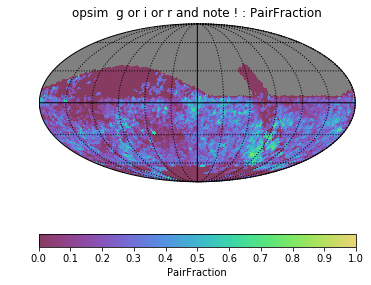

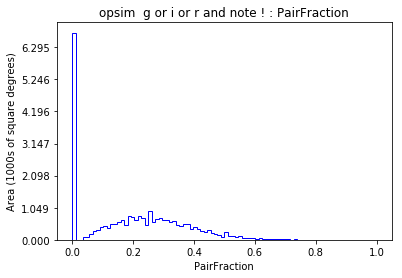

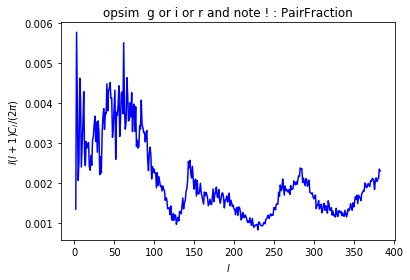

In [4]:


bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint filter = "g" or filter="i" or filter="r" and note != "" for columns ['fieldRA', 'fieldDec', 'observationStartMJD']
Found 136618 visits
Running:  ['opsim_PairFraction_g_or_i_or_r_and_note_!_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "g" or filter="i" or filter="r" and note != """ constraint now.
monopole: 0.5379  dipole: lon: -1.44781, lat: -71.8541, amp: 0.180992
Plotting complete.


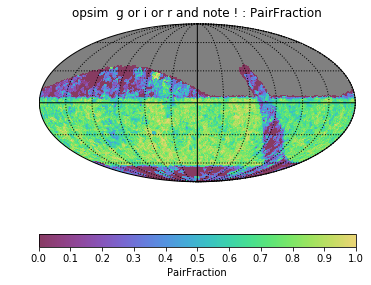

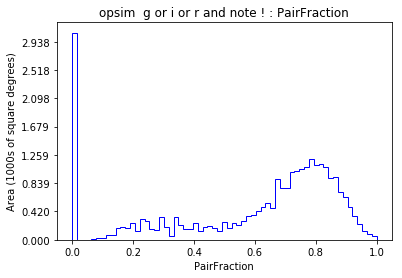

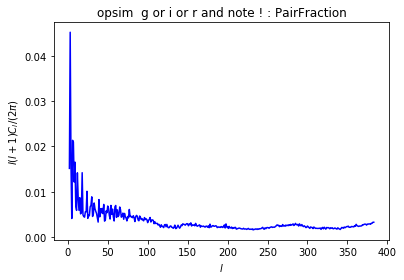

In [5]:
dbFile = 'cadence_1.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)

bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)